In [1]:
import os
import csv
import sys
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'numpy'

In [4]:
plt.set_cmap("viridis")
font = {'size'   : 20}

matplotlib.rc('font', **font)
markersize = 20

<Figure size 432x288 with 0 Axes>

In [5]:
algorithms = ['MIS-Luby', 'MIS-SW08', 'MIS-GP22', 'MIS-GP22-0.1', 'MIS-GP22-0.5', 'MIS-Lam']
n_tests = 50

In [6]:
list_n = list(range(100, 2001, 100))

In [14]:
all_n_active_rounds = {algorithm : {k:0 for k in list_n} for algorithm in algorithms}
all_n_average_awake_rounds = {algorithm : {k:0 for k in list_n} for algorithm in algorithms}

for algorithm in algorithms:
    for n in list_n:
        for denseness in ["sparse"]:
            for i in range(n_tests):
                result_file = f"results_mis/{n}/{denseness}/{algorithm}_{i:03d}.txt"
                with open(result_file, "r") as f:
                    b = f.readlines()
                    b = list(map(lambda x : x.strip("\r\n"), b))
                    a = b[1]
                    check_result = int(b[-1][-1])
                    if check_result == 0:
                        print(f"Algorithm {algorithm} failed at input {result_file}!")
                    (n1,
                     n_selected_nodes,
                     total_awake_rounds,
                     average_awake_rounds,
                     finished_round,
                     n_idle_rounds,
                     n_active_rounds) = map(float, a.split())
                    #print(average_awake_rounds, n_active_rounds)
                    all_n_active_rounds[algorithm][n] += n_active_rounds
                    if algorithm not in ['MIS-Luby', 'MIS-SW08']:
                        all_n_average_awake_rounds[algorithm][n] += average_awake_rounds
                    else:
                        all_n_average_awake_rounds[algorithm][n] += n_active_rounds
                        
            all_n_active_rounds[algorithm][n] /= n_tests
            all_n_average_awake_rounds[algorithm][n] /= n_tests
            all_n_active_rounds[algorithm][n] = np.round(all_n_active_rounds[algorithm][n], 2)
            all_n_average_awake_rounds[algorithm][n] = np.round(all_n_average_awake_rounds[algorithm][n], 2)

Algorithm MIS-Luby failed at input results_mis/1000/sparse/MIS-Luby_000.txt!
Algorithm MIS-Luby failed at input results_mis/1200/sparse/MIS-Luby_022.txt!
Algorithm MIS-Luby failed at input results_mis/1200/sparse/MIS-Luby_039.txt!
Algorithm MIS-Luby failed at input results_mis/1300/sparse/MIS-Luby_006.txt!
Algorithm MIS-Luby failed at input results_mis/1300/sparse/MIS-Luby_033.txt!
Algorithm MIS-Luby failed at input results_mis/1300/sparse/MIS-Luby_046.txt!
Algorithm MIS-Luby failed at input results_mis/1400/sparse/MIS-Luby_006.txt!
Algorithm MIS-Luby failed at input results_mis/1500/sparse/MIS-Luby_025.txt!
Algorithm MIS-Luby failed at input results_mis/1500/sparse/MIS-Luby_043.txt!
Algorithm MIS-Luby failed at input results_mis/1600/sparse/MIS-Luby_010.txt!
Algorithm MIS-Luby failed at input results_mis/1600/sparse/MIS-Luby_019.txt!
Algorithm MIS-Luby failed at input results_mis/1600/sparse/MIS-Luby_025.txt!
Algorithm MIS-Luby failed at input results_mis/1600/sparse/MIS-Luby_034.txt!

In [ ]:
pprint(all_n_active_rounds)

In [7]:
pprint(all_n_average_awake_rounds)

{'MIS-GP22': {100: 3.87,
              200: 4.11,
              300: 4.42,
              400: 4.32,
              500: 4.25,
              600: 4.48,
              700: 4.5,
              800: 4.6,
              900: 4.46,
              1000: 4.59,
              1100: 4.72,
              1200: 4.74,
              1300: 4.73,
              1400: 4.68,
              1500: 4.76,
              1600: 4.67,
              1700: 4.72,
              1800: 4.69,
              1900: 4.76,
              2000: 4.76},
 'MIS-GP22-0.1': {100: 6.61,
                  200: 6.98,
                  300: 7.09,
                  400: 7.15,
                  500: 7.28,
                  600: 7.44,
                  700: 7.56,
                  800: 7.6,
                  900: 7.55,
                  1000: 7.72,
                  1100: 7.7,
                  1200: 7.83,
                  1300: 7.87,
                  1400: 7.87,
                  1500: 7.88,
                  1600: 7.91,
                  170

In [8]:
df_average_awake = pd.DataFrame(all_n_average_awake_rounds)
df_average_awake.to_csv("stat/mis_average_awake.csv")
df_average_awake

,MIS-Luby,MIS-SW08,MIS-GP22,MIS-GP22-0.1,MIS-GP22-0.5,MIS-Lam
100,13.38,9.76,3.87,6.61,4.83,9.88
200,14.40,11.80,4.11,6.98,5.29,9.66
300,14.98,12.68,4.42,7.09,5.53,9.57
400,17.66,13.42,4.32,7.15,5.46,9.66
500,18.32,13.60,4.25,7.28,5.47,9.51
600,19.66,14.94,4.48,7.44,5.70,9.53
700,20.34,15.02,4.50,7.56,5.81,9.58
800,18.30,15.18,4.60,7.60,5.83,9.62
900,19.72,15.46,4.46,7.55,5.84,9.66
1000,20.82,15.72,4.59,7.72,5.90,9.65


In [9]:
df_active_rounds = pd.DataFrame(all_n_active_rounds)
df_active_rounds.to_csv("stat/mis_active_rounds.csv")
df_active_rounds

,MIS-Luby,MIS-SW08,MIS-GP22,MIS-GP22-0.1,MIS-GP22-0.5,MIS-Lam
100,13.38,9.76,15.18,17.14,15.46,18.32
200,14.40,11.80,17.76,17.42,17.38,18.96
300,14.98,12.68,18.22,19.26,18.12,21.30
400,17.66,13.42,18.08,20.86,19.86,21.10
500,18.32,13.60,20.02,23.78,20.32,21.90
600,19.66,14.94,20.28,22.30,21.70,23.06
700,20.34,15.02,20.92,23.78,23.76,23.02
800,18.30,15.18,23.00,23.58,23.16,23.00
900,19.72,15.46,22.10,23.10,23.76,24.44
1000,20.82,15.72,24.02,23.82,24.94,24.88


In [14]:
def plot_df_active_rounds(
    df,
    title="Number of active rounds of different awake-efficient algorithms",
    y_title=-0.2
):
    fig, ax = plt.subplots(1, 1, figsize=(30, 10))
    r = df.index.values[1::2]
    ax.plot(r, df["MIS-GP22"].values[1::2], marker='v', markersize=markersize, label="MIS-GP22-1")
    ax.plot(r, df["MIS-GP22-0.1"].values[1::2], marker='D', markersize=markersize, label="MIS-GP22-0.1")
    ax.plot(r, df["MIS-GP22-0.5"].values[1::2], marker='x', markersize=markersize, label="MIS-GP22-0.5")
    ax.plot(r, df["MIS-Lam"].values[1::2], marker='o', markersize=markersize, label="MIS-Ours")
    ax.set_yticks([15, 18, 21, 24, 27, 30])
    ax.set_ylabel("Number of active rounds")
    ax.set_xticks(r)
    ax.set_xlabel("Number of nodes")
    ax.set_title(title, y=y_title)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(0.6, 1.0), ncol=4)
    plt.grid()
    return ax

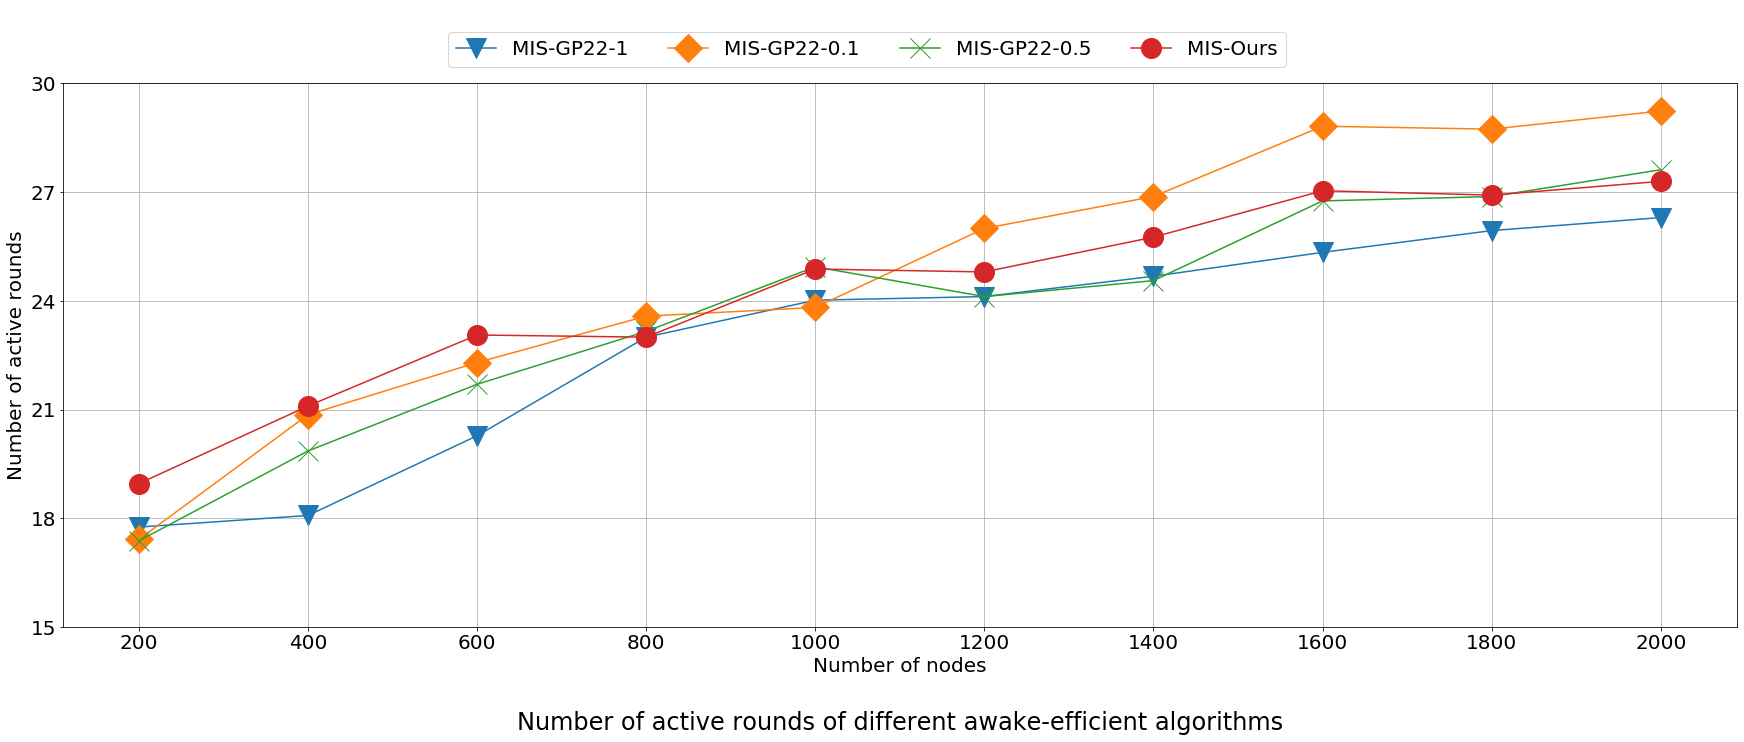

In [15]:
plot_df_active_rounds(df_active_rounds)
plt.savefig("stat/mis_active_rounds.pdf", bbox_inches="tight")

In [16]:
def plot_df_awake_rounds(
    df,
    title="Number of average awake rounds of different algorithms",
    y_title=-0.2
):
    fig, ax = plt.subplots(1, 1, figsize=(30, 10))
    r = df.index.values[1::2]
    ax.plot(r, df["MIS-GP22"].values[1::2], marker='v', markersize=markersize, label="MIS-GP22-1")
    ax.plot(r, df["MIS-Luby"].values[1::2], marker='x', markersize=markersize, label="MIS-Luby")
    ax.plot(r, df["MIS-SW08"].values[1::2], marker='D', markersize=markersize, label="MIS-SW08")
    ax.plot(r, df["MIS-Lam"].values[1::2], marker='o', markersize=markersize, label="MIS-Ours")
    ax.set_yticks(list(range(0,31,5)))
    ax.set_ylabel("Number of average awake rounds")
    ax.set_xticks(r)
    ax.set_xlabel("Number of nodes")
    ax.set_title(title, y=y_title)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(0.6, 1.0), ncol=4)
    plt.grid()
    return ax

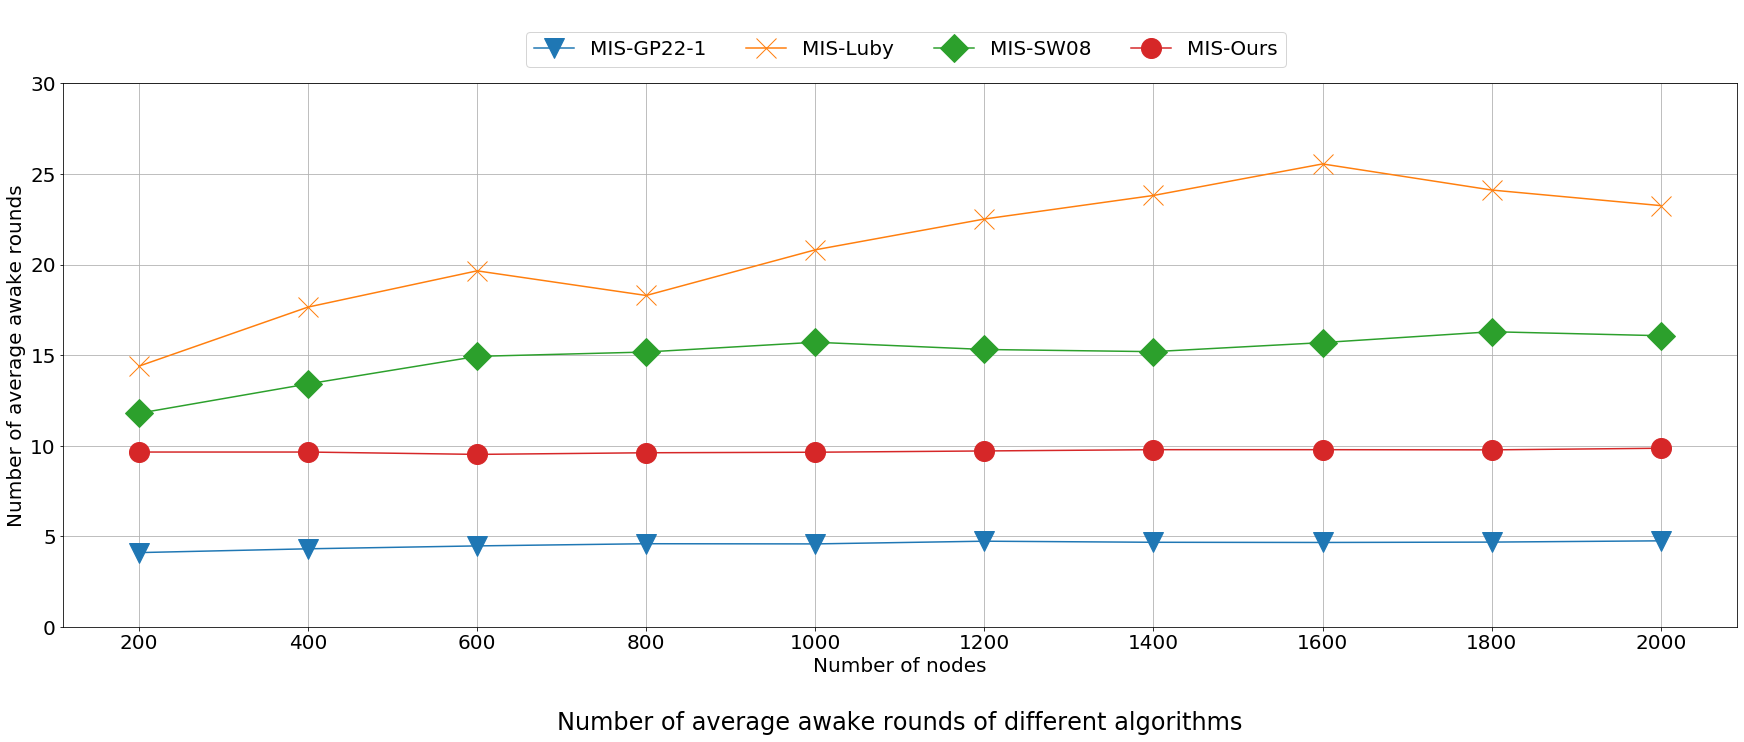

In [17]:
plot_df_awake_rounds(df_average_awake)
plt.savefig("stat/mis_average_awake.pdf", bbox_inches="tight")

In [4]:
import numpy as np

In [10]:
a = np.fft.fft([1,4,7,8])

In [11]:
b = np.fft.ifft([1,4,7,8])

In [12]:
a/b

array([4.        +0.j        , 1.53846154-3.69230769j,
       4.        -0.j        , 1.53846154+3.69230769j])

In [13]:
a

array([20.+0.j, -6.+4.j, -4.+0.j, -6.-4.j])

In [14]:
b

array([ 5. +0.j, -1.5-1.j, -1. +0.j, -1.5+1.j])

In [7]:
c = np.fft.fft([-3,3,2,4,3,1,2,0])

In [8]:
d = np.fft.ifft([-3,3,2,4,3,1,2,0])

In [9]:
c/d

array([8.        +0.j        , 4.05320297+6.89721289j,
       8.        -0.j        , 0.62095433+7.97586458j,
       8.        -0.j        , 0.62095433-7.97586458j,
       8.        -0.j        , 4.05320297-6.89721289j])